In [2]:
!pip install pyAgrum
import pyAgrum as gum

     |████████████████████████████████| 4.4MB 9.1MB/s 


# Exercício sobre redes semânticas

Neste exercício vamos criar uma rede semântica e inferir a partir dela, baseado neste [notebook](http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/01-tutorial.ipynb.html).

## Exemplo inicial

Imagine que temos um ambiente que contém grama e queremos saber se a grama está molhada ou não. Porém, a grama pode estar molhada por conta da chuva, ou por conta de um aspersor de água automático. 

A cidade que está localizada o ambiente varia entre nublado e ensolarado na mesma frequência. Quando está nublado é provável que chova. Quando não está nublado é provável que não chova.

Quando não está nublado, o aspersor fica acionado e desligado na mesma frequência. Já quando está nublado, muito pouco provável que o aspersor estará acionado.

Quando não chove nem o aspersor está ligado, é certo de a grama não estar molhada. Quando o aspersor está ligado e não está chovendo ou quando o aspersor está desligado e está chovendo, é muito provável que a grama esteja molhada. Já se o aspersor está ligado e está chovendo, é quase certo de a grama estar molhada.

Esta descrição está codificada na visualização abaixo.

![alt text](http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/images/waterprinkler.png)

Agora vamos criar nossa rede bayesiana:

In [3]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, parameters: 0, compression ratio: 100-10^-inf% }


Em seguida criaremos os quatro nós:

In [0]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
s=bn.add(gum.LabelizedVariable('s','sprinkler ?',2))
r=bn.add(gum.LabelizedVariable('r','rain ?',2))
w=bn.add(gum.LabelizedVariable('w','wet grass ?',2))

E os arcos que ligam eles:

In [0]:
bn.addArc(c,s)
bn.addArc(c,r)
bn.addArc(s,w)
bn.addArc(r,w)

De forma que a rede está desta forma:

In [6]:
import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x42ef600) BN{nodes: 4, arcs: 4, domainSize: 16, parameters: 18, compression ratio: -12% }

Agora vamos criar as tabelas de probabilidades associadas a cada nó. Quando o nó não tem condições a priori, ele é definido da seguinte forma:

In [7]:
bn.cpt(c).fillWith([0.5,0.5])

(gum::Potential<double>@0x2ccad00) <c:0> :: 0.5 /<c:1> :: 0.5

Quando ele tem condições a priori, é definido desta forma:

In [8]:
bn.cpt(s)[{'c': 0}] = [0.5,0.5]
bn.cpt(s)[{'c': 1}] = [0.9,0.1]
bn.cpt(s)

(gum::Potential<double>@0x2ccb4c0) <s:0|c:0> :: 0.5 /<s:1|c:0> :: 0.5 /<s:0|c:1> :: 0.9 /<s:1|c:1> :: 0.1

In [9]:
bn.cpt(w)[{'r': 0, 's': 0}] = [1, 0]
bn.cpt(w)[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt(w)[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt(w)

(gum::Potential<double>@0x2ccbce0) <w:0|s:0|r:0> :: 1 /<w:1|s:0|r:0> :: 0 /<w:0|s:1|r:0> :: 0.1 /<w:1|s:1|r:0> :: 0.9 /<w:0|s:0|r:1> :: 0.1 /<w:1|s:0|r:1> :: 0.9 /<w:0|s:1|r:1> :: 0.01 /<w:1|s:1|r:1> :: 0.99

In [10]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]
bn.cpt(r)

(gum::Potential<double>@0x2ccbb20) <r:0|c:0> :: 0.8 /<r:1|c:0> :: 0.2 /<r:0|c:1> :: 0.2 /<r:1|c:1> :: 0.8

Qual é a probabilidade de a grama estar molhada em um caso geral?

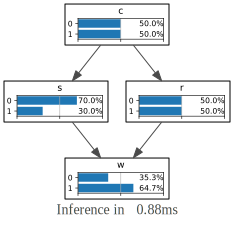

In [11]:
gnb.showInference(bn,evs={})

Vemos que a probabilidade da grama estar molhada no geral é de 64,7%

Supondo que queremos inferir a partir das seguintes condições a priori:
Não está nublado e o aspersor está ligado. Qual a probabilidade de a grama estar molhada?

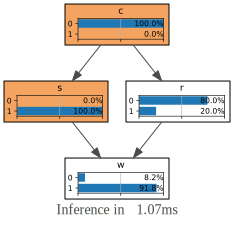

In [12]:
gnb.showInference(bn,evs={'s':1,'c':0})

Vemos que a probabilidade é de 91,8%.



## Agora é sua vez!

Imagine que está nublado e está chovendo. Qual a probabilidade da grama estar molhada?

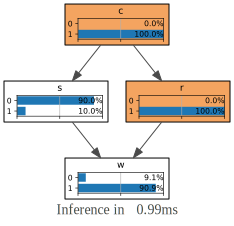

In [13]:
## Faça seu código aqui
gnb.showInference(bn,evs={'c':1,'r':1})

###Resposta
A probablidade da grama estar molhada é de 90,9%

Agora queremos que você crie sua própria rede bayesiana baseada em um cenário novo:

Um carro tem muitos componentes que são suscetíveis a falhas. Queremos saber se o nosso carro vai funcionar o motor ou não. 


A bateria do carro foi comprada já usada, então possivelmente ela seja velha. Já o alternador e a correia do alternador são originais, então é pouco provável que estejam quebradas.

Se a bateria do carro for velha, é provável que ela esteja descarregada. Se o alternador do carro estiver quebrado, é quase certo de que a bateria descarregue. Se a correia do alternador do carro estiver quebrada, é quase certo de que a bateria descarregue.

Se a bateria do carro está descarrregada, é quase certo do carro não ligar. Se o óleo do motor estiver baixo, é possível que o motor venha a fundir e, obviamente, não ligar. Se o carro estiver sem gasolina, é certo de o carro não ligar.

1. Construa uma rede bayesiana que represente o texto acima fazendo uso do pyAgrum.
2. Estime subjetivamente, com base no texto, as tabelas de probabilidades e insira-as na rede bayesiana.
3. Responda as seguintes perguntas: 
    1. No caso geral, qual a probabilidade de o carro não ligar?
    2. Se a correia do alternador estiver quebrada e a bateria esteja descarregada, qual a probabilidade do carro ligar?
    3. Se o óleo estiver baixo, qual a probabilidade de o carro ligar?

A probabilidade é de ...

In [0]:
# Faça seu código aqui

In [15]:
bn2=gum.BayesNet('CarroLigar')
print(bn2)

BN{nodes: 0, arcs: 0, domainSize: 1, parameters: 0, compression ratio: 100-10^-inf% }


In [0]:
bateriaVelha=bn2.add(gum.LabelizedVariable('batVe','Bateria Velha ?',2))
bateriaUsada=bn2.add(gum.LabelizedVariable('batUs','Bateria Usada ?',2))
alternadorQuebrado=bn2.add(gum.LabelizedVariable('altQue','Alternador Quebrado ?',2))
correiraAlternadorQuebrado=bn2.add(gum.LabelizedVariable('corAltQue','Correia Alternador Quebrada ?',2))
bateriaDescarregada=bn2.add(gum.LabelizedVariable('batDes','Bateria Descarregada ?',2))
oleoMotorBaixo=bn2.add(gum.LabelizedVariable('oleMotBai','Motor Fundido ?',2))
semGasolina=bn2.add(gum.LabelizedVariable('semGas','Sem Gasolina ?',2))
carroLigar=bn2.add(gum.LabelizedVariable('carLig','Carro Ligar ?',2))

In [17]:
bn2

(gum::BayesNet<double>@0x45dcc00) BN{nodes: 8, arcs: 0, domainSize: 256, parameters: 16, compression ratio: 93% }

In [0]:
bn2.addArc(bateriaUsada,bateriaVelha)
bn2.addArc(bateriaVelha,bateriaDescarregada)
bn2.addArc(alternadorQuebrado,bateriaDescarregada)
bn2.addArc(correiraAlternadorQuebrado,bateriaDescarregada)
bn2.addArc(bateriaDescarregada,carroLigar)
bn2.addArc(oleoMotorBaixo,carroLigar)
bn2.addArc(semGasolina,carroLigar)

In [19]:
bn2

(gum::BayesNet<double>@0x45dcc00) BN{nodes: 8, arcs: 7, domainSize: 256, parameters: 46, compression ratio: 82% }

In [20]:
bn2.cpt(bateriaUsada).fillWith([0,1])

(gum::Potential<double>@0x30c3ce0) <batUs:0> :: 0 /<batUs:1> :: 1

In [21]:
bn2.cpt(bateriaVelha)[{'batUs': 0}] = [0,0]
bn2.cpt(bateriaVelha)[{'batUs': 1}] = [0.5,0.5]
bn2.cpt(bateriaVelha)

(gum::Potential<double>@0x30c2680) <batVe:0|batUs:0> :: 0 /<batVe:1|batUs:0> :: 0 /<batVe:0|batUs:1> :: 0.5 /<batVe:1|batUs:1> :: 0.5

In [22]:
bn2.cpt(correiraAlternadorQuebrado).fillWith([0.9,0.1])

(gum::Potential<double>@0x43f1ee0) <corAltQue:0> :: 0.9 /<corAltQue:1> :: 0.1

In [23]:
bn2.cpt(alternadorQuebrado).fillWith([0.9,0.1])

(gum::Potential<double>@0x30c2e80) <altQue:0> :: 0.9 /<altQue:1> :: 0.1

In [24]:
bn2.cpt(bateriaDescarregada)[{'batVe': 0, 'corAltQue': 0, 'altQue': 0}] = [1,0]
bn2.cpt(bateriaDescarregada)[{'batVe': 1, 'corAltQue': 0, 'altQue': 0}] = [0.1,0.9]
bn2.cpt(bateriaDescarregada)[{'batVe': 0, 'corAltQue': 1, 'altQue': 0}] = [0.1,0.9]
bn2.cpt(bateriaDescarregada)[{'batVe': 1, 'corAltQue': 1, 'altQue': 0}] = [0.01,0.99]
bn2.cpt(bateriaDescarregada)[{'batVe': 0, 'corAltQue': 0, 'altQue': 1}] = [0.01,0.99]
bn2.cpt(bateriaDescarregada)[{'batVe': 1, 'corAltQue': 0, 'altQue': 1}] = [0.01,0.99]
bn2.cpt(bateriaDescarregada)[{'batVe': 0, 'corAltQue': 1, 'altQue': 1}] = [0.01,0.99]
bn2.cpt(bateriaDescarregada)[{'batVe': 1, 'corAltQue': 1, 'altQue': 1}] = [0,1]
bn2.cpt(bateriaDescarregada)

(gum::Potential<double>@0x30c2a80) <batDes:0|batVe:0|altQue:0|corAltQue:0> :: 1 /<batDes:1|batVe:0|altQue:0|corAltQue:0> :: 0 /<batDes:0|batVe:1|altQue:0|corAltQue:0> :: 0.1 /<batDes:1|batVe:1|altQue:0|corAltQue:0> :: 0.9 /<batDes:0|batVe:0|altQue:1|corAltQue:0> :: 0.01 /<batDes:1|batVe:0|altQue:1|corAltQue:0> :: 0.99 /<batDes:0|batVe:1|altQue:1|corAltQue:0> :: 0.01 /<batDes:1|batVe:1|altQue:1|corAltQue:0> :: 0.99 /<batDes:0|batVe:0|altQue:0|corAltQue:1> :: 0.1 /<batDes:1|batVe:0|altQue:0|corAltQue:1> :: 0.9 /<batDes:0|batVe:1|altQue:0|corAltQue:1> :: 0.01 /<batDes:1|batVe:1|altQue:0|corAltQue:1> :: 0.99 /<batDes:0|batVe:0|altQue:1|corAltQue:1> :: 0.01 /<batDes:1|batVe:0|altQue:1|corAltQue:1> :: 0.99 /<batDes:0|batVe:1|altQue:1|corAltQue:1> :: 0 /<batDes:1|batVe:1|altQue:1|corAltQue:1> :: 1

In [25]:
bn2.cpt(oleoMotorBaixo).fillWith([0.9,0.1])

(gum::Potential<double>@0x30c2460) <oleMotBai:0> :: 0.9 /<oleMotBai:1> :: 0.1

In [26]:
bn2.cpt(semGasolina).fillWith([0.9,0.1])

(gum::Potential<double>@0x30c3700) <semGas:0> :: 0.9 /<semGas:1> :: 0.1

In [27]:
bn2.cpt(carroLigar)[{'batDes': 0, 'semGas': 0, 'oleMotBai': 0}] = [0,1]
bn2.cpt(carroLigar)[{'batDes': 1, 'semGas': 0, 'oleMotBai': 0}] = [0.9,0.1]
bn2.cpt(carroLigar)[{'batDes': 0, 'semGas': 1, 'oleMotBai': 0}] = [1,0]
bn2.cpt(carroLigar)[{'batDes': 1, 'semGas': 1, 'oleMotBai': 0}] = [1,0]
bn2.cpt(carroLigar)[{'batDes': 0, 'semGas': 0, 'oleMotBai': 1}] = [0.8,0.2]
bn2.cpt(carroLigar)[{'batDes': 1, 'semGas': 0, 'oleMotBai': 1}] = [1,0]
bn2.cpt(carroLigar)[{'batDes': 0, 'semGas': 1, 'oleMotBai': 1}] = [1,0]
bn2.cpt(carroLigar)[{'batDes': 1, 'semGas': 1, 'oleMotBai': 1}] = [1,0]
bn2.cpt(carroLigar)

(gum::Potential<double>@0x30c38a0) <carLig:0|batDes:0|oleMotBai:0|semGas:0> :: 0 /<carLig:1|batDes:0|oleMotBai:0|semGas:0> :: 1 /<carLig:0|batDes:1|oleMotBai:0|semGas:0> :: 0.9 /<carLig:1|batDes:1|oleMotBai:0|semGas:0> :: 0.1 /<carLig:0|batDes:0|oleMotBai:1|semGas:0> :: 0.8 /<carLig:1|batDes:0|oleMotBai:1|semGas:0> :: 0.2 /<carLig:0|batDes:1|oleMotBai:1|semGas:0> :: 1 /<carLig:1|batDes:1|oleMotBai:1|semGas:0> :: 0 /<carLig:0|batDes:0|oleMotBai:0|semGas:1> :: 1 /<carLig:1|batDes:0|oleMotBai:0|semGas:1> :: 0 /<carLig:0|batDes:1|oleMotBai:0|semGas:1> :: 1 /<carLig:1|batDes:1|oleMotBai:0|semGas:1> :: 0 /<carLig:0|batDes:0|oleMotBai:1|semGas:1> :: 1 /<carLig:1|batDes:0|oleMotBai:1|semGas:1> :: 0 /<carLig:0|batDes:1|oleMotBai:1|semGas:1> :: 1 /<carLig:1|batDes:1|oleMotBai:1|semGas:1> :: 0

###  1. No caso geral, qual a probabilidade de o carro não ligar?

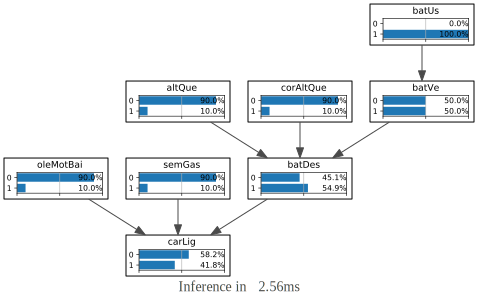

In [28]:
gnb.showInference(bn2,evs={})

### 2. Se a correia do alternador estiver quebrada e a bateria esteja descarregada, qual a probabilidade do carro ligar?

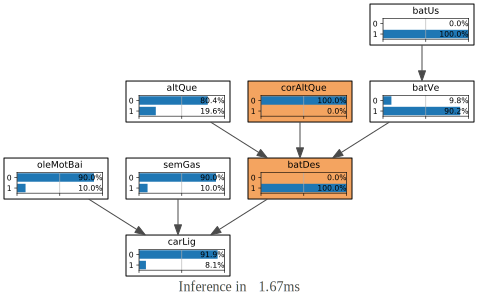

In [31]:
gnb.showInference(bn2,evs={'corAltQue':0,'batDes':1})

### 3. Se o óleo estiver baixo, qual a probabilidade de o carro ligar?

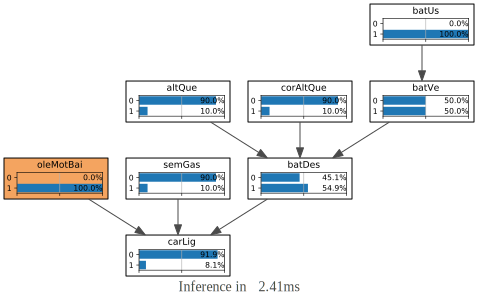

In [30]:
gnb.showInference(bn2,evs={'oleMotBai':1})